# UVG - Minería de Datos
# Proyecto 1 - Modelo Final
### Luis Quezada 18028
### Jennifer Sandoval 18962
### Esteban del Valle 18221

Basado en el anaálisis preliminar y creación de modelos de prueba, se decidió generar un modelo de modelos basado en el algoritmo de *Boosting*.Siendo estos K-NN k=13, SVM Linear y RNA

## Modulos y Librerias

In [1]:
from statistics import mode
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model

Using TensorFlow backend.


## Función para mostrar una Matriz de Confusión

In [2]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Modelo final

In [3]:
class DiabetesClassifier():
    
    def __init__(self,test_size=0.2):
        dataset = pd.read_csv('diabetes.csv')
        dataset.dropna(inplace=True)
        dataset = dataset.drop(columns=['DiabetesPedigreeFunction'])
        X = dataset.iloc[:, [0,1,2,3,4,5,6]].values
        y = dataset.iloc[:, 7].values
        X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=0)

        self.sc = StandardScaler()
        X_train = self.sc.fit_transform(X_train)
        
        self.setupSVM(X_train, y_train)
        self.setupKNN(X_train, y_train)
        self.setupRNA(X_train, y_train)
    
    def getTestData(self):
        return self.X_test,self.y_test
    
    def setupSVM(self,X_train, y_train):
        self.LinearSVM_Classifier = SVC(kernel='linear', random_state=0)
        self.LinearSVM_Classifier.fit(X_train, y_train)
    
    def setupKNN(self,X_train, y_train):
        self.KNN_Classifier = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2)
        self.KNN_Classifier.fit(X_train, y_train)
    
    def setupRNA(self,X_train, y_train):
        self.RNA_Classifier = load_model('model-7-14-28-28-14-1.h5')
    
    def predict(self,inputData):
        inputData = [inputData]
        inputData_scaled = self.sc.transform(inputData)

        pred1 = self.LinearSVM_Classifier.predict(inputData_scaled)[0] > 0.5
        pred2 = self.KNN_Classifier.predict(inputData_scaled)[0] > 0.5
        pred3 = self.RNA_Classifier.predict(inputData_scaled)[0][0] > 0.5
        
        return mode([pred1,pred2,pred3])
    
    def getConfusionMatrix(self):
        Y_pred = []
        for x in self.X_test:
            Y_pred.append(1) if classifier.predict(x) else Y_pred.append(0)
        return confusion_matrix(self.y_test, Y_pred)
    
    def getAccuracy(self):
        Y_pred = []
        for x in self.X_test:
            Y_pred.append(1) if classifier.predict(x) else Y_pred.append(0)
        return accuracy_score(self.y_test, Y_pred)

## Testing de DiabetesClassifier

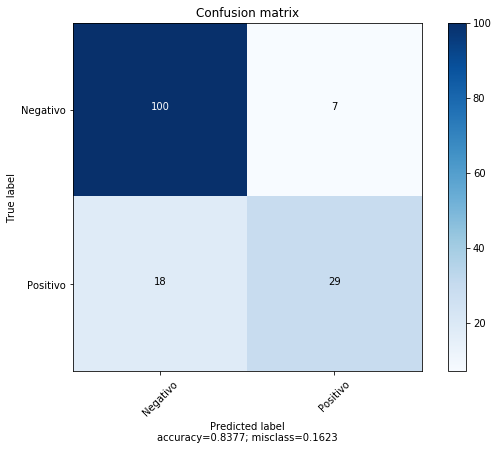

0.8376623376623377


In [4]:
classifier = DiabetesClassifier()
cm = classifier.getConfusionMatrix()
plot_confusion_matrix(cm,['Negativo','Positivo'])
print(classifier.getAccuracy())

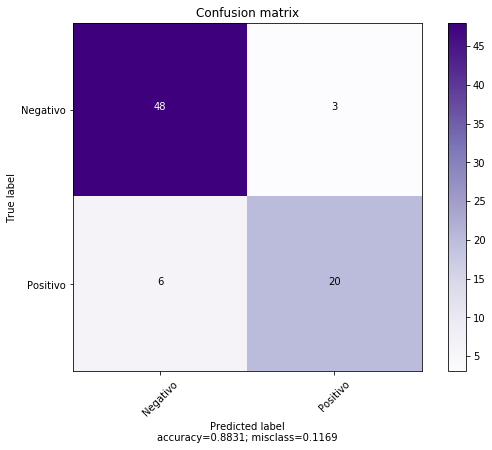

0.8831168831168831


In [5]:
classifier2 = DiabetesClassifier(0.1)
cm2 = classifier2.getConfusionMatrix()
plot_confusion_matrix(cm2,['Negativo','Positivo'],cmap='Purples')
print(classifier2.getAccuracy())

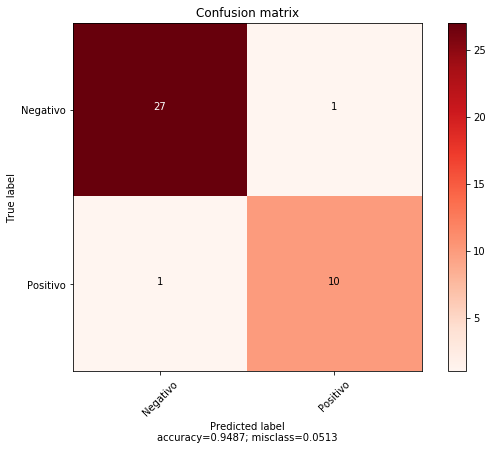

0.9487179487179487


In [6]:
classifier3 = DiabetesClassifier(0.05)
cm3 = classifier3.getConfusionMatrix()
plot_confusion_matrix(cm3,['Negativo','Positivo'],cmap='Reds')
print(classifier3.getAccuracy())

## Uso del DiabetesClassifier

In [7]:
testInput = [1.0, 199.0, 76.0, 43.0, 0.0, 42.9, 22.0]
classifier.predict(testInput)

True